In [2]:
import matplotlib.pyplot as plt
from evalutils.io import SimpleITKLoader
import SimpleITK
import numpy as np

In [3]:
def load_mha(path):
  loader = SimpleITKLoader()
  im = loader.load_image(path)
  im = SimpleITK.GetArrayFromImage(im)
  return im

In [7]:
arr = load_mha('./output/images/hie-lesion-segmentation/overlay.mha')
# arr = load_mha('/usr/mvl2/itdfh/dev/BONBID-HIE-MICCAI2023/bonbidhie_eval/test/MGHNICU_010-VISIT_01_lesion.mha')

In [8]:
arr.shape

(23, 128, 128)

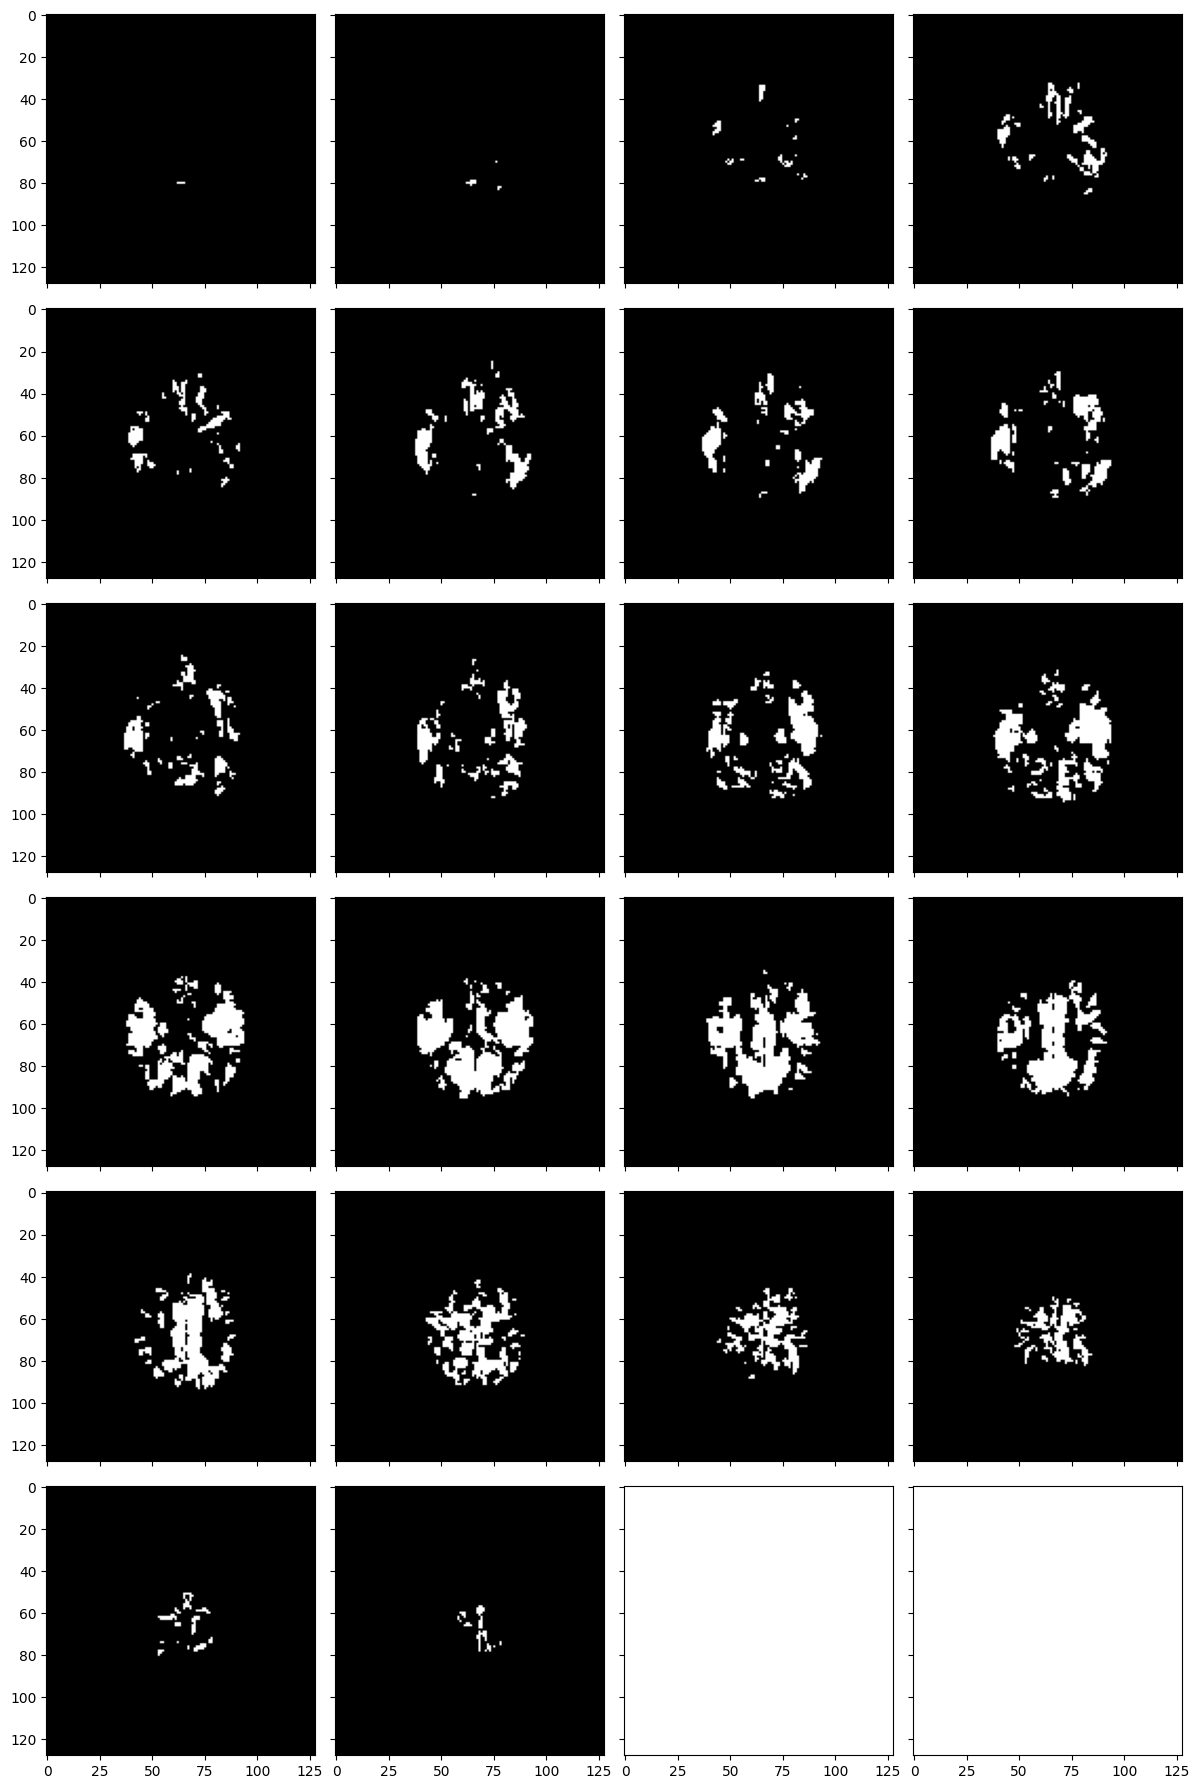

In [9]:
idx, = np.where(arr.max(axis=(1, 2)))
cols = 4
rows = int(np.ceil(len(idx) / cols))

fig, axs = plt.subplots(rows, cols, figsize=(3 * cols, 3 * rows),
                        sharex=True, sharey=True)
for i, ax in zip(idx, axs.ravel()):
  ax.imshow(arr[i], cmap='gray')
plt.tight_layout()
fig.show()